<a href="https://colab.research.google.com/github/Aleksanderprofic/Machine-Learning/blob/master/LinearRegression/MultipleLinearRegression/sklearn/sklearn_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression <a name="mlr"></a>

## Data loading and data visualisation <a name="dladv"></a>



### Data loading <a name="dl"></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

startups_data = pd.read_csv('50_Startups.csv')
startups_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Taking care of eventual missing values

In [85]:
number_of_rows = len(startups_data)

for column in startups_data:
    column_series = startups_data[column]  
    number_of_correct_values = column_series.describe()['count']
    number_of_NaNs = number_of_correct_values - number_of_rows
    print(f"Number of missing values in {column}: {number_of_NaNs}")

Number of missing values in R&D Spend: 0.0
Number of missing values in Administration: 0.0
Number of missing values in Marketing Spend: 0.0
Number of missing values in State: 0
Number of missing values in Profit: 0.0


In [87]:
print(startups_data['R&D Spend'].describe())

count        50.000000
mean      73721.615600
std       45902.256482
min           0.000000
25%       39936.370000
50%       73051.080000
75%      101602.800000
max      165349.200000
Name: R&D Spend, dtype: float64


Dataset doesn't contain missing values

### Data Visualisation

#### R&D Spend vs Profit <a name="rdsvp"></a>

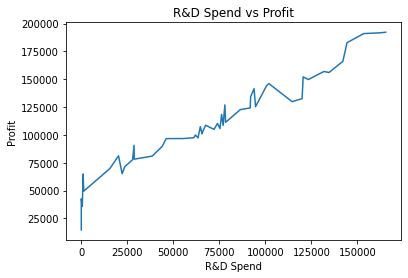

In [0]:
startups_data = startups_data.sort_values('R&D Spend')
plt.plot(startups_data['R&D Spend'], startups_data.Profit)
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

In [0]:
startups_data['R&D Spend'].corr(startups_data.Profit)

0.9729004656594825

*Strong Correlation between R&D Spend and Profit*

#### Administration vs Profit <a name="avp"></a>

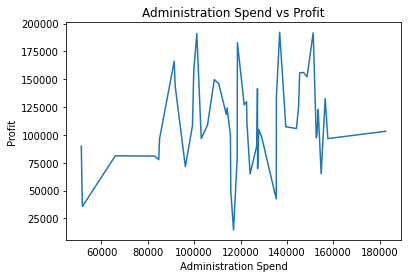

In [0]:
startups_data = startups_data.sort_values('Administration')
plt.plot(startups_data.Administration, startups_data.Profit)
plt.title('Administration Spend vs Profit')
plt.xlabel('Administration Spend')
plt.ylabel('Profit')
plt.show()

In [0]:
startups_data.Administration.corr(startups_data.Profit)

0.2007165682687214

*Weak Correlation between Administration and Profit*

#### Marketing Spend vs Profit <a name="msvp"></a>

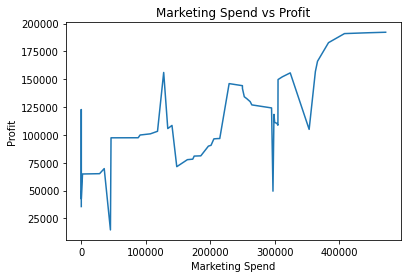

In [0]:
startups_data = startups_data.sort_values('Marketing Spend')
plt.plot(startups_data['Marketing Spend'], startups_data.Profit)
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

In [0]:
startups_data['Marketing Spend'].corr(startups_data.Profit)

0.7477657217414767

*Strong Correlation between Marketing Spend and Profit*

#### Does State matter? <a name="dsm"></a>

##### Profit by State <a name="pbs"></a>

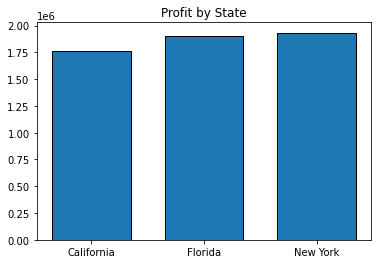

In [0]:
x = range(3)

sum_bystate_startups_data = startups_data.groupby('State').sum()

plt.bar(x, sum_bystate_startups_data.Profit, width=0.7, edgecolor='black')
plt.xticks(x, sum_bystate_startups_data.index)
plt.title('Profit by State')
plt.show()

##### Mean Profit by State <a name="mpbs"></a>

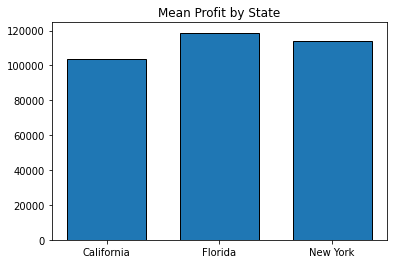

In [0]:
mean_bystate_startups_data = startups_data.groupby('State').mean()

plt.bar(x, mean_bystate_startups_data.Profit, width=0.7, edgecolor='black')
plt.xticks(x, mean_bystate_startups_data.index)
plt.title('Mean Profit by State')
plt.show()

*It seems like State matters only a little in terms of future startup's Profit*

---



## Data preprocessing <a name="dp"></a>

### Extracting dependent and independent variables <a name="edaiv"></a>

In [0]:
X = startups_data.iloc[:, :-1].values
y = startups_data.iloc[:, -1].values

### OneHotEncoding categorical variables <a name="ohecv"></a>

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([('State', OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)

We don't have to get rid of dummy variable trap because Multiple Linear Regression model will do it automatically

### Splitting dataset into the Training Set and the Test Set <a name="dlasdittsatts"></a>

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training, prediction and results visualisation <a name="tparv"></a>

### Training the Multiple Linear Regression model on the Training set <a name="ttmlrmotts"></a>

In [0]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the Test set results <a name="pttsr"></a>

In [0]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((
    y_pred.reshape(len(y_pred), 1), 
    y_test.reshape(len(y_test), 1), 
    (y_pred - y_test).reshape(len(y_pred), 1)), 
    axis=1))

[[127277.35 141585.52 -14308.17]
 [ 99104.96 103282.38  -4177.42]
 [102670.92 101004.64   1666.28]
 [153067.63 152211.77    855.86]
 [ 45215.22  42559.73   2655.49]
 [135832.95 144259.4   -8426.45]
 [112395.03 110352.25   2042.78]
 [147859.45 129917.04  17942.41]
 [ 72412.38  90708.19 -18295.81]
 [ 63450.68  65200.33  -1749.65]]


*   1st column - Predicted values
*   2nd column - Actual values
*   3rd column - Difference between Predicted and Actual values

### Visualising the Test set predictions and actual values <a name="vttspaav"></a>

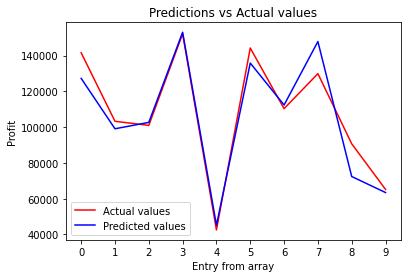

In [0]:
x = range(len(y_test))
plt.plot(x, y_test, color='red')
plt.plot(x, y_pred, color='blue')
plt.legend(['Actual values', 'Predicted values'])
plt.xticks(x)
plt.xlabel('Entry from array')
plt.ylabel('Profit')
plt.title('Predictions vs Actual values')
plt.show()

### The final equation of Multiple Linear Regression <a name="tfeomlr"></a>

In [0]:
print(regressor.coef_)
print(regressor.intercept_)

[ 5.54e+01 -1.58e+03  1.52e+03  8.23e-01 -3.71e-02  2.45e-02]
50178.07502887831


The equation of our multiple linear regression model is:

$$\textrm{Profit} = 55.4 \times \textrm{Dummy State 1} - 1580 \times \textrm{Dummy State 2} + 1520 \times \textrm{Dummy State 3} + 0.823 \times \textrm{R&D Spend} - 0.0371 \times \textrm{Administration} + 0.0245 \times \textrm{Marketing Spend} + 50178.07$$